In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

In [2]:
# path = './PowerBi.csv'
path = './all_query_term_data.csv'
dataset = pd.read_csv(path)
# print(dataset.head())
print(dataset.describe())

          Total(4)        Total        Title  Description     Features  \
count  1100.000000  1100.000000  1100.000000  1100.000000  1100.000000   
mean      4.700909    14.115455     0.632727     1.377273     1.517273   
std       4.500793    22.807066     0.523881     1.281361     1.987374   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     2.000000     0.000000     0.000000     0.000000   
50%       3.000000     5.000000     1.000000     1.000000     1.000000   
75%       7.000000    15.000000     1.000000     2.000000     2.000000   
max      26.000000   109.000000     2.000000     7.000000    12.000000   

       Length_of_Features     Benefits  Length_of_Benefits  Service-scope  \
count         1100.000000  1100.000000          1100.00000    1100.000000   
mean             8.170909     1.173636             7.51000       0.283636   
std              2.167648     1.731745             2.37497       0.744715   
min              1.000000

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 40 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               1100 non-null   object 
 1   Total(4)                                   1100 non-null   int64  
 2   Total                                      1100 non-null   int64  
 3   Title                                      1100 non-null   int64  
 4   Description                                1100 non-null   int64  
 5   Features                                   1100 non-null   int64  
 6   Length_of_Features                         1100 non-null   int64  
 7   Benefits                                   1100 non-null   int64  
 8   Length_of_Benefits                         1100 non-null   int64  
 9   Service-scope                              1100 non-null   int64  
 10  User-support            

In [4]:
dataset_Top50 = dataset[dataset['Target'] == 0]
dataset_Bottom50 = dataset[dataset['Target'] == 1]

In [5]:
print(dataset_Top50.describe())

        Total(4)      Total      Title  Description   Features  \
count  33.000000  33.000000  33.000000    33.000000  33.000000   
mean   10.787879  15.848485   0.909091     2.575758   4.212121   
std     6.142870  10.805442   0.291937     1.299767   3.049155   
min     0.000000   0.000000   0.000000     0.000000   0.000000   
25%     6.000000   8.000000   1.000000     2.000000   1.000000   
50%    11.000000  15.000000   1.000000     3.000000   4.000000   
75%    14.000000  18.000000   1.000000     4.000000   6.000000   
max    24.000000  42.000000   1.000000     5.000000  12.000000   

       Length_of_Features   Benefits  Length_of_Benefits  Service-scope  \
count           33.000000  33.000000           33.000000      33.000000   
mean             7.333333   3.090909            6.636364       0.121212   
std              2.313907   2.590411            2.848445       0.331434   
min              1.000000   0.000000            2.000000       0.000000   
25%              6.000000   1.

In [6]:
print(dataset_Bottom50.describe())

          Total(4)        Total        Title  Description     Features  \
count  1067.000000  1067.000000  1067.000000  1067.000000  1067.000000   
mean      4.512652    14.061856     0.624180     1.340206     1.433927   
std       4.309179    23.079517     0.527211     1.263392     1.887078   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     2.000000     0.000000     0.000000     0.000000   
50%       3.000000     5.000000     1.000000     1.000000     1.000000   
75%       6.000000    14.000000     1.000000     2.000000     2.000000   
max      26.000000   109.000000     2.000000     7.000000    11.000000   

       Length_of_Features     Benefits  Length_of_Benefits  Service-scope  \
count         1067.000000  1067.000000         1067.000000    1067.000000   
mean             8.196813     1.114339            7.537020       0.288660   
std              2.158944     1.665242            2.355244       0.753412   
min              1.000000

In [7]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
X_dummy = dataset.iloc[:, 1:-1]
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.30, shuffle=True)
classifier = RandomForestClassifier(n_estimators=2000)

In [9]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
result = confusion_matrix(y_test, y_pred)

In [10]:
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[  0   9]
 [  1 320]]


In [11]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print(result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.97      1.00      0.98       321

    accuracy                           0.97       330
   macro avg       0.49      0.50      0.49       330
weighted avg       0.95      0.97      0.96       330



In [12]:
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2)

Accuracy: 0.9696969696969697


In [13]:
for i in range(len(y_test)):
    if (y_test[i] != y_pred[i]) and y_pred[i]==1:
        print(X_test[i], y_test[i])

[6. 7. 1. 2. 2. 7. 1. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 0
[ 0.  0.  0.  0.  0.  7.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.
  0.  0.] 0
[20. 20.  1.  5.  7.  8.  7.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.
  0.  0.] 0
[11. 11.  1.  3.  4.  7.  3.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.] 0
[12. 27.  1.  3.  5.  4.  3.  3.  0.  0.  1.  7.  1.  0.  0.  0.  0.  0.
  0.  2.  0.  0.  0.  0.  1.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.
  2.  1.] 0
[11. 16.  1.  3.  4.  9.  3.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  1.  2.  0.  0.  0.
  0.  0.] 0
[17. 17.  1.  4.  4.  7.  8.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  

In [14]:
# Using Pearson Correlation
# plt.figure(figsize=(12, 10))
cor = dataset.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [15]:
# importance = classifier.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

In [16]:
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
print(len(indices))

[ 7 28  0  4  1  5  6  3 30 29 31 32  2  9 34 11 37  8 12 24 19 36 14 10
 27 23 20 16 35 13 33 18 17 22 21 15 25 26]
38


In [17]:
print(X.shape)

(1100, 38)


In [18]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. Feature:%s: (%f)" % (f + 1, X_dummy.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Feature:Length_of_Benefits: (0.123334)
2. Feature:Query_index: (0.122186)
3. Feature:Total(4): (0.113732)
4. Feature:Features: (0.097964)
5. Feature:Total: (0.096971)
6. Feature:Length_of_Features: (0.067759)
7. Feature:Benefits: (0.064971)
8. Feature:Description: (0.051548)
9. Feature:Training: (0.048139)
10. Feature:Planning: (0.041625)
11. Feature:Setup-and-migration: (0.034314)
12. Feature:Quality-assurance-and-performance-testing: (0.014795)
13. Feature:Title: (0.014782)
14. Feature:User-support: (0.013750)
15. Feature:Ongoing-support: (0.011639)
16. Feature:Using-the-service: (0.011561)
17. Feature:Energy-efficiency: (0.011500)
18. Feature:Service-scope: (0.010235)
19. Feature:Scaling: (0.009851)
20. Feature:Operational-security: (0.005829)
21. Feature:Availability-and-resilience: (0.005652)
22. Feature:Separation-between-users: (0.005643)
23. Feature:Resellers: (0.005640)
24. Feature:Onboarding-and-offboarding: (0.004727)
25. Feature:Pricing: (0.004344)
26. F

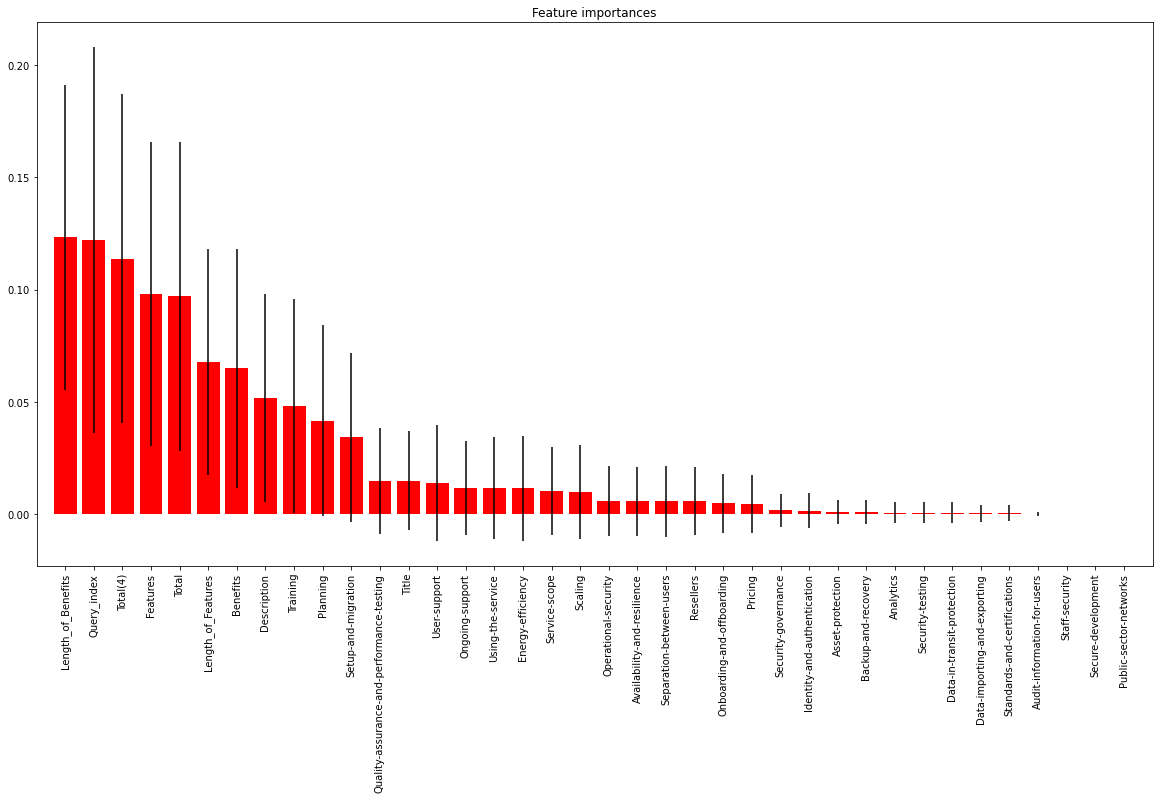

In [19]:


# Plot the impurity-based feature importances of the forest
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X_dummy.columns[indices])
plt.xticks(rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


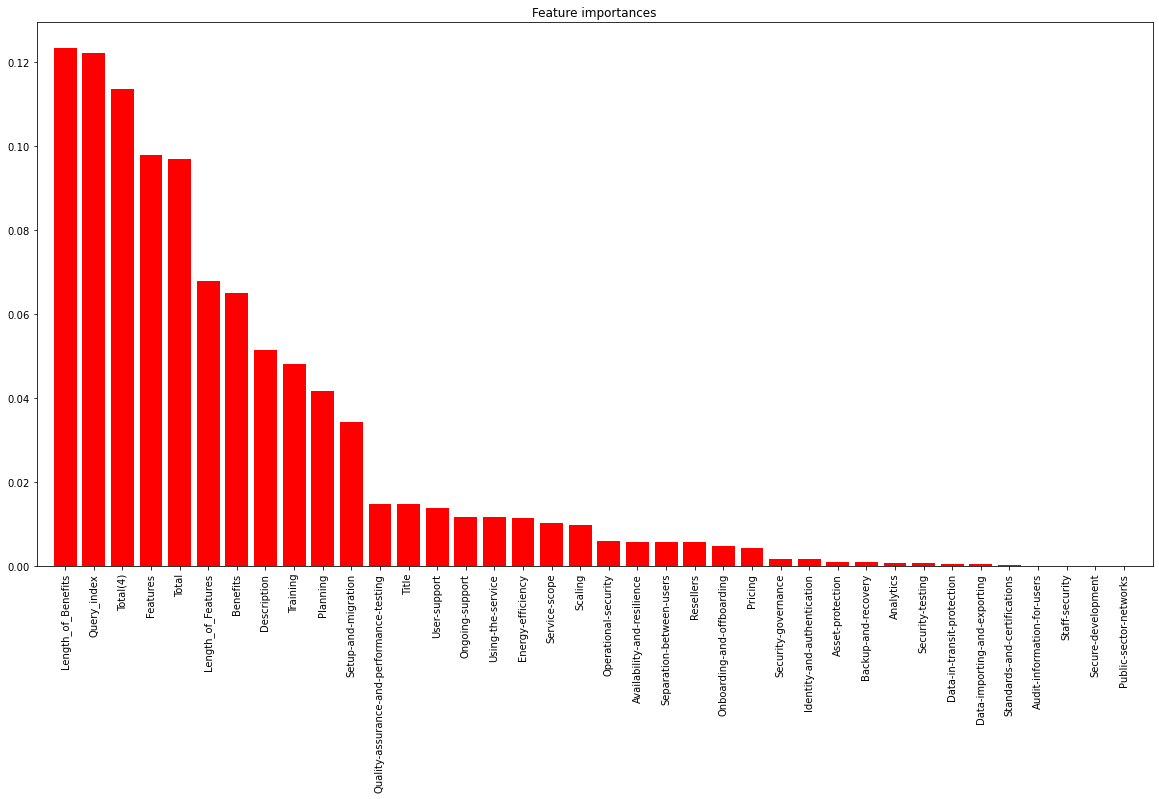

In [20]:

# Plot the impurity-based feature importances of the forest
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), X_dummy.columns[indices])
plt.xticks(rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [21]:
small_dataset = dataset.iloc[:,indices[:10]+1]
print(small_dataset.head())

   Length_of_Benefits  Query_index  Total(4)  Features  Total  \
0                  10            0        12         5     12   
1                   3            0         5         1      8   
2                   9            0        11         4     16   
3                   8            0         8         4      8   
4                  10            0         7         3     22   

   Length_of_Features  Benefits  Description  Training  Planning  
0                  10         2            4       0.0       0.0  
1                   7         0            3       1.0       1.0  
2                   9         3            3       0.0       2.0  
3                   9         1            2       0.0       0.0  
4                  10         2            1       2.0       6.0  


In [22]:
small_dataset_Top50 = small_dataset[dataset['Target'] == 0]
small_dataset_Bottom50 = small_dataset[dataset['Target'] == 1]

In [23]:
print(small_dataset_Top50.describe())

       Length_of_Benefits  Query_index   Total(4)   Features      Total  \
count           33.000000    33.000000  33.000000  33.000000  33.000000   
mean             6.636364     5.000000  10.787879   4.212121  15.848485   
std              2.848445     3.211308   6.142870   3.049155  10.805442   
min              2.000000     0.000000   0.000000   0.000000   0.000000   
25%              4.000000     2.000000   6.000000   1.000000   8.000000   
50%              7.000000     5.000000  11.000000   4.000000  15.000000   
75%              9.000000     8.000000  14.000000   6.000000  18.000000   
max             10.000000    10.000000  24.000000  12.000000  42.000000   

       Length_of_Features   Benefits  Description   Training   Planning  
count           33.000000  33.000000    33.000000  33.000000  33.000000  
mean             7.333333   3.090909     2.575758   1.727273   0.757576  
std              2.313907   2.590411     1.299767   3.607914   1.677616  
min              1.000000   

In [24]:
print(small_dataset_Bottom50.describe())

       Length_of_Benefits  Query_index     Total(4)     Features        Total  \
count         1067.000000  1067.000000  1067.000000  1067.000000  1067.000000   
mean             7.537020     5.000000     4.512652     1.433927    14.061856   
std              2.355244     3.163761     4.309179     1.887078    23.079517   
min              1.000000     0.000000     0.000000     0.000000     0.000000   
25%              6.000000     2.000000     2.000000     0.000000     2.000000   
50%              8.000000     5.000000     3.000000     1.000000     5.000000   
75%             10.000000     8.000000     6.000000     2.000000    14.000000   
max             10.000000    10.000000    26.000000    11.000000   109.000000   

       Length_of_Features     Benefits  Description     Training     Planning  
count         1067.000000  1067.000000  1067.000000  1067.000000  1067.000000  
mean             8.196813     1.114339     1.340206     0.657919     0.407685  
std              2.158944     